In [1]:
import numpy as np
import pandas as pd
from sklearn import linear_model
from sklearn.linear_model import Ridge, RidgeCV, Lasso, LassoCV
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, RepeatedKFold, cross_val_score, GridSearchCV
#import statsmodels.formula.api as smf
import statsmodels.api as sm
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.cross_decomposition import PLSRegression
from sklearn.pipeline import Pipeline


In [2]:
df1 = pd.read_csv('Insurance.csv')
print(df1.shape)
print(df1.head())
df1['claims'].count()


(2182, 7)
         per  km  zone  bonus  make  insured  claims
0  11.649460   2     3      2     6   669.34      42
1   9.615939   3     3      1     2    55.70       6
2   0.000000   3     7      3     4     1.06       0
3   8.028129   2     7      7     5    81.78       3
4  11.222640   1     4      5     5   200.68      14


2182

In [3]:
df1.head()


,per,km,zone,bonus,make,insured,claims
0,11.649460,2,3,2,6,669.34,42
1,9.615939,3,3,1,2,55.70,6
2,0.000000,3,7,3,4,1.06,0
3,8.028129,2,7,7,5,81.78,3
4,11.222640,1,4,5,5,200.68,14


In [4]:
df2 = df1.copy()
df2 = df2[df2['claims']>0]
print(df2.shape)

print(df2.head())


(1797, 7)
         per  km  zone  bonus  make  insured  claims
0  11.649460   2     3      2     6   669.34      42
1   9.615939   3     3      1     2    55.70       6
3   8.028129   2     7      7     5    81.78       3
4  11.222640   1     4      5     5   200.68      14
6  11.290310   3     5      2     6    64.73       6


In [5]:
# public1 = public1['parks'].astype('category')

In [6]:

df2[['zone','make']]= df2[['zone','make']].astype('category')

In [7]:
df2.head()


,per,km,zone,bonus,make,insured,claims
0,11.649460,2,3,2,6,669.34,42
1,9.615939,3,3,1,2,55.70,6
3,8.028129,2,7,7,5,81.78,3
4,11.222640,1,4,5,5,200.68,14
6,11.290310,3,5,2,6,64.73,6


In [8]:
df3 = pd.get_dummies(df2,drop_first = True)
df3.head(3)


,per,km,bonus,insured,claims,zone_2,zone_3,zone_4,zone_5,zone_6,zone_7,make_2,make_3,make_4,make_5,make_6,make_7,make_8,make_9
0,11.649460,2,2,669.34,42,0,1,0,0,0,0,0,0,0,0,1,0,0,0
1,9.615939,3,1,55.70,6,0,1,0,0,0,0,1,0,0,0,0,0,0,0
3,8.028129,2,7,81.78,3,0,0,0,0,0,1,0,0,0,1,0,0,0,0


### 1-a)Report thr Dimension of new dataframe

In [9]:
 print (' Dimension of new dataframe :',df3.shape)
    

 Dimension of new dataframe : (1797, 19)


### PCA Analyse

[2.321584387525639, 2.2803056090606595, 2.2659247385022825, 2.274491394758371, 2.2759019180289846, 2.2627929093602006, 2.2566076003490063, 2.251654634354075, 2.253103869239156, 2.249621387513384, 2.187665983640311, 2.1797963692174704, 2.1815586186813753, 2.1870954826189912, 1.5164140412753322, 1.4871465953449043, 1.3743767457864877, 1.3582046481578618, 1.3582046481578618]


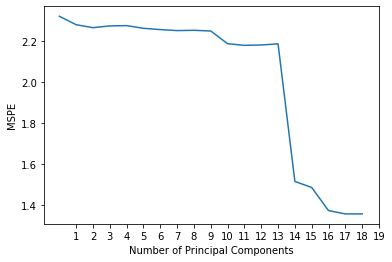

In [10]:
X = df3.drop('per',axis = 1)
y = df3[['per']]
#X.head(2)

X_train, X_test , y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

std_scale = StandardScaler().fit(X_train)
X_train_std = std_scale.transform(X_train)
X_test_std = std_scale.transform(X_test)

pca = PCA()
PCs_train = pca.fit_transform(X_train_std)
PCs_test = pca.transform(X_test_std)

LModel = linear_model.LinearRegression()
MSPEs = []

# Calculate MSPE: adding one component at a time
for i in np.arange(1, 20):
  LModel.fit(PCs_train[:,:i], y_train)
  MSPEs.append(mean_squared_error(y_test, LModel.predict(PCs_test[:,:i])))

print(MSPEs)

# Plot MSPEs results    
plt.plot(MSPEs)
plt.xlabel('Number of Principal Components')
plt.ylabel('MSPE')
plt.xticks(range(1,20))
plt.show()

### 2 (a)

**According to uppercase calculaton  components which get choosen are 14 Components which have the most variance.**

### 2 (b) : Scree Plot and Cumulative Variance

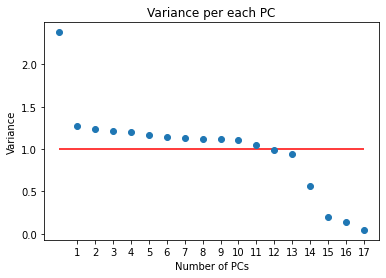

In [11]:
plt.plot(pca.explained_variance_, marker = 'o', linestyle= 'none')
plt.xticks(range(1,20))
plt.hlines(pca.explained_variance_.mean(), xmin = 0, xmax = 17, color = 'red')
plt.xlabel('Number of PCs')
plt.ylabel('Variance')
plt.title('Variance per each PC')

plt.show()

In [12]:
# Calculation of Cumulative Variance 
cum_var = np.cumsum(pca.explained_variance_)
cum_var

array([ 2.37853716,  3.64713827,  4.88133052,  6.09397199,  7.3000951 ,
        8.46497353,  9.61251636, 10.74790187, 11.87255275, 12.98547818,
       14.08817936, 15.14008316, 16.13390987, 17.07004611, 17.63048017,
       17.82818626, 17.96832823, 18.01433121])

In [13]:
prob_var = cum_var / cum_var[-1]
prob_var

array([0.13203583, 0.2024576 , 0.27096929, 0.33828466, 0.4052382 ,
       0.46990218, 0.53360384, 0.59663064, 0.65906153, 0.72084154,
       0.78205398, 0.84044659, 0.89561526, 0.94758145, 0.97869191,
       0.98966684, 0.99744631, 1.        ])

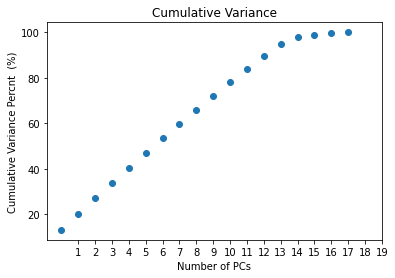

In [14]:
plt.plot(prob_var * 100, marker = 'o', linestyle= 'none')
plt.xticks(range(1,20))
plt.title('Cumulative Variance')
plt.xlabel('Number of PCs')
plt.ylabel('Cumulative Variance Percnt  (%)')
plt.show()

### 2 (c) : According to the charts, 14 components report the most varaince and information.